<a href="https://colab.research.google.com/github/Vivek-23-Titan/Covid-19-Masked-Face-Detection-using-YoloFace/blob/master/Covid_19_Mask_Face_Detection_Yolo_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries**##

In [ ]:
import matplotlib.pyplot as plt

import cv2
import glob

import numpy as np
from numpy import asarray

import PIL
from PIL import ImageOps, Image
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

In [ ]:
!git clone https://github.com/Vivek-23-Titan/yoloface

In [ ]:
#Improve drive to access the data - images and videos
from google.colab import drive
drive.mount('/content/drive')

In [4]:
%cd /content/drive/My Drive/YoloFace/
%ls

/content/drive/My Drive/YoloFace
'Copy of Copy of yolov3-wider_16000.weights'   yolov3-wider_16000.weights
'Copy of yolov3-wider_16000.weights'


In [5]:
#Move the yoloface weight file
!mv yolov3-wider_16000.weights /content/yoloface/model-weights

In [6]:
%cd /content/yoloface

/content/yoloface


In [7]:
#Creating a temporary directory for storing the video frames
!rm -rf /content/frames
!mkdir -p /content/frames

In [9]:
#Provide the path to the video
vidcap = cv2.VideoCapture('/content/drive/My Drive/Mask_Videos/Vivek_Mask.mp4')

In [ ]:
#Splitting of the video frames

time = []

def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite("/content/frames/"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image every second
count=0
t = 0
success = getFrame(sec)
while success:
    time.append(t)
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
    t = t+frameRate
    if count%10 == 0:
      print("Frame:", count)
    count = count + 1

print("Total frames:", count-1)

Frame: 0
Frame: 10
Frame: 20
Frame: 30
Frame: 40
Frame: 50
Frame: 60
Total frames: 62


In [ ]:
#Storing the video frames into an array for processing

path = glob.glob(r"/content/frames/*.jpg")
X_test1 = []

for img in path:
    n = cv2.imread(img)    
    X_test1.append(n)
X_test1 = np.array(X_test1)

print(X_test1.shape)

(62, 640, 352, 3)


##**YoloFace for extracting faces from the video frames**##

In [12]:
#Create a directory for storing the extracted faces
!rm -rf /content/yoloface/outputs
!rm -rf /content/yoloface/faces

In [ ]:
!python3 yoloface.py --image /content/frames/0.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/1.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/2.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/3.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/4.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/5.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/6.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/7.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/8.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/9.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/10.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/11.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/12.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/13.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/14.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/15.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/16.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/17.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/18.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/19.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/20.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/21.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/22.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/23.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/24.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/25.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/26.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/27.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/28.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/29.jpg --output-dir outputs/

In [ ]:
!python3 yoloface.py --image /content/frames/30.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/31.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/32.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/33.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/34.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/35.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/36.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/37.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/38.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/39.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/40.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/41.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/42.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/43.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/44.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/45.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/46.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/47.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/48.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/49.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/50.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/51.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/52.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/53.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/54.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/55.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/56.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/57.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/58.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/59.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/60.jpg --output-dir outputs/
!python3 yoloface.py --image /content/frames/61.jpg --output-dir outputs/

In [ ]:
#Storing the video frames into an array for processing

path = glob.glob(r"/content/yoloface/faces/*.jpg")
X_faces = []

for img in path:
    n = cv2.imread(img)
    X_faces.append(n)

X_faces = np.array(X_faces)
print(X_faces.shape)
print("Accuracy of YoloFace is:", len(X_faces)/len(X_test1)*100)

(52, 224, 224, 3)
Accuracy of YoloFace is: 83.87096774193549


In [ ]:
#Storing the video frames into an array for processing

path = glob.glob(r"/content/yoloface/outputs/*.jpg")
mask_face = []

for img in path:
    n = cv2.imread(img)
    mask_face.append(n)

mask_face = np.array(mask_face)
print(mask_face.shape)

(63,)


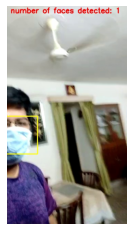

Face: 6


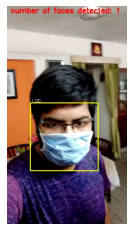

Face: 8


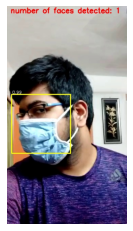

Face: 15


In [40]:
#Bounding Box on Masked faces from the video frames
f = [6, 8, 15]

for i in f:

  # load the photo and extract the face
  try:
      plt.imshow(cv2.cvtColor(mask_face[i], cv2.COLOR_BGR2RGB))
      plt.axis("off")
      plt.show()
      print("Face:", i)
  except:
    continue

In [ ]:
#Showing all the extracted faces from the video frames

for i in range(len(X_faces)):

  # load the photo and extract the face
  try:

      plt.imshow(cv2.cvtColor(X_faces[i], cv2.COLOR_BGR2RGB))
      plt.axis("off")
      plt.show()
      print("Face:", i)
      Time.append(time[i])

  except:
    continue

##**Install the Face Recognition Models Required**##

In [ ]:
#Installing the models
!pip install keras-vggface  #Face recognition model
!pip install mtcnn  #Face detection model

import mtcnn
from mtcnn import MTCNN

from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [ ]:
#This is the function for extracting faces from images
face = []

# extract a single face from a given photograph
def extract_face(pixels, required_size=(224, 224)):
	# load image from file
	# create the detector, using default weights
  detector = MTCNN()
	# detect faces in the image
  results = detector.detect_faces(pixels)
  if results == []:
    print("No Face Detected")
  else:
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    confidence = results[0]['confidence']
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.array(image)
    return face_array, confidence

In [ ]:
#VGGFACE model definition for Face recognition

def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)

In [ ]:
#Database of Known Individuals

img_dir = '/content/drive/My Drive/Face_Database/' # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
Known = []
for f1 in files:
    img = cv2.imread(f1)
    Known.append(img)
Known = np.array(Known)
print("Total number of Individuals in the database:", len(Known))

Total number of Individuals in the database: 10


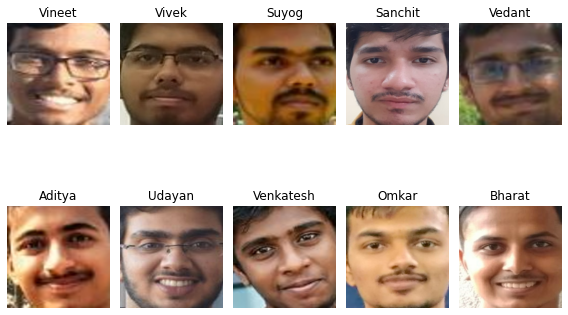

Total Number of Individuals are: 10


In [ ]:
#Displaying the Faces of the Known Individuals from the database

Known_Faces = []
Face_Labels = ['Vineet', 'Vivek', 'Suyog', 'Sanchit','Vedant', 'Aditya','Udayan','Venkatesh', 'Omkar', 'Bharat',]

fig=plt.figure(figsize=(8, 6))
columns = 5
rows = 2
for i in range(1, columns*rows +1):

# load the photo and extract the face
  try:
      img, confi = extract_face(Known[i-1])
      fig.add_subplot(rows, columns, i)
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.axis("off")
      plt.title(Face_Labels[i-1])
      Known_Faces.append(img)

  except:
    continue

plt.tight_layout()
plt.show()

print("Total Number of Individuals are:", len(Known_Faces))

In [ ]:
#Individuals to be identified

img_dir = '/content/drive/My Drive/Person/' # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
Unknown = []
for f1 in files:
    img = cv2.imread(f1)
    Unknown.append(img)
Unknown = np.array(Unknown)
print("Cases of Unknown Indentities:", len(Unknown))

Cases of Unknown Indentities: 18


The person to be identified


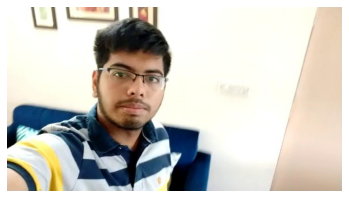

The face of the person to be identified


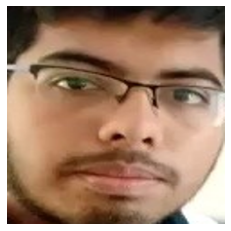

In [ ]:
#Select the person to be identified from the unknown indentities

Unknown_Person = Unknown[5]

print("The person to be identified")
plt.imshow(cv2.cvtColor(Unknown_Person, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# load the photo and extract the face
try:
  Unknown_Face, confi = extract_face(Unknown_Person)
  print("The face of the person to be identified")
  plt.imshow(cv2.cvtColor(Unknown_Face, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()

except:
  try:
    cv2.imwrite("/content/frames/00.jpg", Unknown_Person)     # save frame as JPG file
    !python3 yoloface.py --image /content/frames/00.jpg --output-dir outputs/

    path = glob.glob(r"/content/yoloface/faces/00_yoloextractedface.jpg")
    Unknown_Face = []

    for img in path:
      Unknown_Face = cv2.imread(img)

    Unknown_Face = np.array(Unknown_Face)
    print("The face of the person to be identified")
    plt.imshow(cv2.cvtColor(Unknown_Face, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
  except:
    print("Please try another image")

In [ ]:
#Comparison of Person to  be identified with the existing known individuals

model_face_score = []
count = []

for i in range(len(Known_Faces)):
  faces = [Known_Faces[i], Unknown_Face]
  count.append(i)
  scores = get_model_scores(faces)
  model_face_score.append(scores)
print(len(model_face_score))

In [ ]:
#Computing and checking if the person to be identified is form the known individuals database
#0.4 for unmasked half face and 0.5 for full masked face

a = []
cosine_score = []
identified = 0
for i in range(len(model_face_score)):
  x = model_face_score[i]
  print(cosine(x[0], x[1]))

  if cosine(x[0], x[1]) <= 0.4:
    print("For Person:", i, "Faces Matched")
    cosine_score.append(cosine(x[0], x[1]))
    a.append(i)
    identified = 1
  else:
    print("For Person:", i, "Faces Not Matched")

#If more than 1 person is identified, then the person with minimum loss is selected.
if len(cosine_score) > 1:
  cosine_score = np.array(cosine_score)
  min_loss = np.argmin(cosine_score)
  a = a[min_loss]
else:
  try:
    a = a[0]
  except:
    a = 0

0.42763203382492065
For Person: 0 Faces Not Matched
0.18236541748046875
For Person: 1 Faces Matched
0.4513639211654663
For Person: 2 Faces Not Matched
0.6294338405132294
For Person: 3 Faces Not Matched
0.602648138999939
For Person: 4 Faces Not Matched
0.5799594223499298
For Person: 5 Faces Not Matched
0.5593070685863495
For Person: 6 Faces Not Matched
0.6571060121059418
For Person: 7 Faces Not Matched
0.6048080921173096
For Person: 8 Faces Not Matched
0.6636302173137665
For Person: 9 Faces Not Matched


The person identified is: Vivek


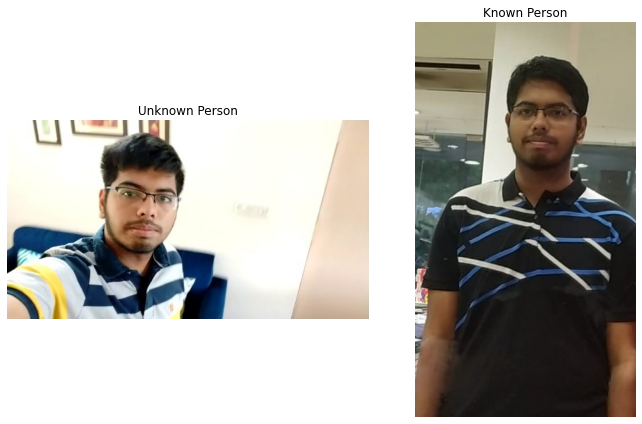

In [ ]:
#Display the Person to be identified and his identity

if identified == 0:
  print("The person's identity is not known.")
else:
  print("The person identified is:", Face_Labels[a])

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
  ax1.imshow(cv2.cvtColor(Unknown_Person, cv2.COLOR_BGR2RGB))
  ax1.set_title('Unknown Person')
  ax1.axis("off")
  fig.show()

  ax2.imshow(cv2.cvtColor(Known[a], cv2.COLOR_BGR2RGB))
  ax2.set_title("Known Person")
  ax2.axis("off")
  fig.show()

  plt.tight_layout()

##**Person Re-Identification from Video Frames**

In [ ]:
#Clear background sessions if any

from keras import backend as K
K.clear_session()

In [ ]:
#Compare if the person to be identified is present in the video frames or not

model_scores = []
count = []

for i in range(len(X_faces)):
  faces = [X_faces[i], Unknown_Face]
  count.append(i)
  scores = get_model_scores(faces)
  model_scores.append(scores)
  if i%10 == 0:
    print("Images processed:", i, "/", len(X_faces))
#print(len(model_scores))

Images processed: 0 / 52
Images processed: 10 / 52
Images processed: 20 / 52
Images processed: 30 / 52
Images processed: 40 / 52
Images processed: 50 / 52


In [ ]:
#Computing and Checking if the person to be identified is present in the video frames
# 0.435 loss for normal faces
# 0.51 for masked faces

correct = wrong = 0
COUNT = []
FP = []
repeat = 0

for i in range(len(model_scores)):

#Below condition is valid for the first frames which are not recognized
  if len(COUNT) == 1 and repeat == 1:
    repeat = 0
    for j in range(i):
      print("Frame:", j, "will be matched with", COUNT[j],"correctly identified frame...")
      #Comparing the Unidentified frame with previous matched frame to check whether its the same person

      faces2 = [X_faces[j], X_faces[COUNT[j]]]
      x = get_model_scores(faces2)
      print(cosine(x[0], x[1]))

      if cosine(x[0], x[1]) <= 0.51:  #Threshold cosine distance for Re-Id
        print("Frame:", j, "Face Matched with correct frame:", COUNT[j])
        correct = correct + 1
        COUNT.append(count[j])

      else:
        print("For frame:", j, "Faces Not Matched")
      
  COUNT.sort()

  #The normal matching condition starts from here...
  x = model_scores[i]
  print(cosine(x[0], x[1]))

  if cosine(x[0], x[1]) <= 0.51:
    print("For frame:", i, "Faces Matched")
    correct = correct + 1
    COUNT.append(count[i])

  else:
    try:
      if len(COUNT) == 0:
        print("Frame:", i, "Will be reprocessed later...")
        repeat = 1


      elif len(COUNT) != 0:
        print("For frame:", i, "Faces Not Matched\nReprocessing the frame to verify...")
        #Comparing the Unidentified frame with previous matched frame to check whether its the same person
        x = get_model_scores(faces2)

        print(cosine(x[0], x[1]))

        if cosine(x[0], x[1]) <= 0.51:
          print("For frame:", i, "Faces Matched with previous correct frame:", COUNT[-1])
          correct = correct + 1
          COUNT.append(count[i])

        else:
          print("For frame:", i, "Faces Not Matched")
          wrong = wrong + 1
          FP.append(i)

    except:
        print("For frame:", i, "Faces Not Matched")
        wrong = wrong + 1
        FP.append(i)

In [ ]:
#Print the accuracy metrics of the models
print("\nThe number of correct matches are:", correct)
print("The number of wrong matches are:", wrong)
print("The accuracy of VGGFace is:", correct/(correct+wrong)*100)
print("Accuracy of YoloFace is:", len(X_faces)/len(X_test1)*100)


The number of correct matches are: 48
The number of wrong matches are: 5
The accuracy of VGGFace is: 90.56603773584906
Accuracy of YoloFace is: 83.87096774193549


In [ ]:
#Display the unidentified frames
for i in range(len(FP)):
  plt.imshow(cv2.cvtColor(X_faces[FP[i]], cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()